<a href="https://colab.research.google.com/github/yunions/Statistics/blob/master/Chap11_%ED%86%B5%EA%B3%84%EC%A0%81_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/yunions/Statistics.git

fatal: destination path 'Statistics' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import erf
import matplotlib.pyplot as plt

%precision 3
np.random.seed(1111)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

# 11. 통계적 가설검정

## 11.1 통계적 가설검정(Statistical hypothesis testing)
- **방법** </br>
1. 모집단의 모수에 관한 두 가지 가설(귀무가설, 대립가설) 설정</br>
2. 표본으로부터 통계량 계산</br>
3. 어느 가설이 옳은지 판단</br>

<img src = 'https://github.com/yunions/Statistics/blob/master/image/confidence_interval.PNG?raw=true'>

### 11.1.1 통계적 가설검정의 기본
<img src = 'https://github.com/yunions/Statistics/blob/master/image/how_to_check_mean.PNG?raw=true'>

In [3]:
#sample(n=14)
df = pd.read_csv('/content/Statistics/data/ch11_potato.csv')
sample = np.array(df['무게'])
s_mean = np.mean(sample)
print(f'sample = {sample}\nn = {len(sample)}, sample mean = {s_mean : .3f}')

sample = [122.02 131.73 130.6  131.82 132.05 126.12 124.43 132.89 122.79 129.95
 126.14 134.45 127.64 125.68]
n = 14, sample mean =  128.451


In [4]:
# a = 0.05
mu = 130
sigma = 9/14
rv = stats.norm(mu, np.sqrt(sigma)) #표본평균의 분포
lcl = rv.isf(0.95) #LCL 생성
lcl

128.681

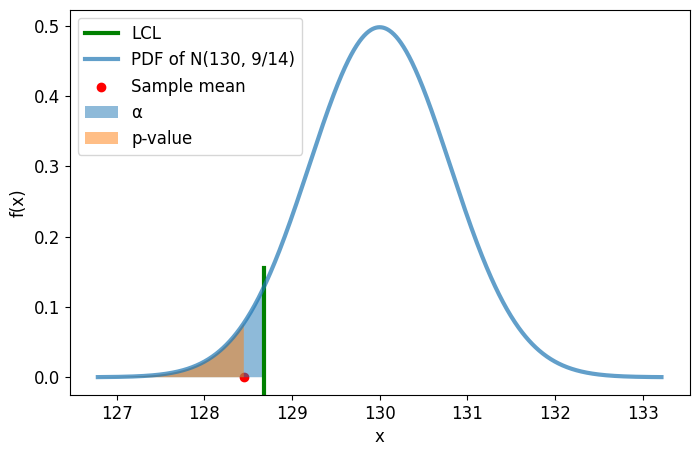

In [5]:
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
y = rv.pdf(x)
#y_cum = 0.5 * (1 + erf((x - mu)/(np.sqrt(2 * sigma**2))))
plt.scatter(s_mean,0, c = 'red', label= 'Sample mean') #sample의 위치
plt.axvline(x = lcl, ymin=0, ymax= rv.pdf(lcl) + 0.2, c = 'green', label= 'LCL')
plt.plot(x, y, alpha=0.7, label='PDF of N(130, 9/14)')
lcl_range = np.linspace(mu - 5*sigma, lcl, 100)
plt.fill_between(lcl_range, y1= rv.pdf(lcl_range), alpha=0.5, label = 'α')
x_range = np.linspace(mu - 5*sigma, s_mean, 100)
plt.fill_between(x_range, y1= rv.pdf(x_range), alpha=0.5, label = 'p-value') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

In [6]:
# a = 0.05
std_mu = 0
std_sigma = 1
rv_z = stats.norm(std_mu, np.sqrt(std_sigma)) #표본평균의 분포
lcl_z = rv_z.isf(0.95) #LCL 생성
lcl

128.681

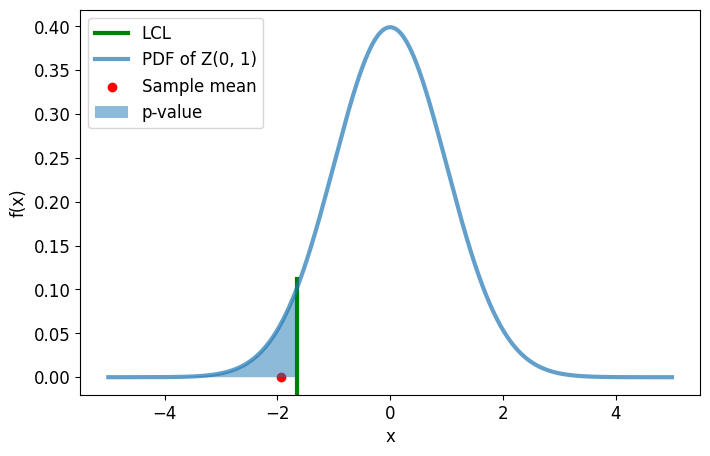

In [7]:
x = np.linspace(std_mu - 5*std_sigma, std_mu + 5*std_sigma, 1000)
y = rv_z.pdf(x)
z = (s_mean - 130) / np.sqrt(9/14) # standardization
#y_cum = 0.5 * (1 + erf((x - mu)/(np.sqrt(2 * sigma**2))))
plt.scatter(z,0, c = 'red', label= 'Sample mean') #sample의 위치
plt.axvline(x = lcl_z, ymin=0, ymax= rv.pdf(lcl_z) + 0.3, c = 'green', label= 'LCL')
x_range = np.linspace(std_mu - 5*std_sigma, lcl_z, 100)
plt.fill_between(x_range, y1= rv_z.pdf(x_range), alpha=0.5, label = 'p-value') 
plt.plot(x, y, alpha=0.7, label='PDF of Z(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

### 11.1.2 가설검정의 두 가지 오류
- 제 1종 오류(α) : 귀무가설이 옳을 때, 귀무가설을 기각하는 오류</br>
α = 위험률 : 분석가가 제어할 수 있는 확률(유의수준)
- 제 2종 오류(β) : 대립가설이 옳을 때, 귀무가설을 채택하는 오류</br>
(1-β) = 검정력 : 분석가가 제어할 수 없는 확률(모집단에 의해서 결정)
<img src = 'https://www.nbshare.io/static/snapshots/cm_colored_1-min.png'>

In [9]:
#제 1종 오류의 상황 = 평균이 130인데, 이것보다 작다고 판단
rv = stats.norm(130, 3) # N(130, 9)

c = stats.norm().isf(0.95) #N(0,1) alpha = 0.05
n_samples = 10000 #10000번 수행
cnt = 0
for _ in range(n_samples): #10000번 수행
    sample_ = np.round(rv.rvs(14), 2) #n=14인 샘플링 진행
    s_mean_ = np.mean(sample_) #샘플의 평균
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c: #LCL밖인지 확인
        cnt += 1
cnt / n_samples #제 1종 오류를 범할 확률

0.052

In [10]:
#제 2종 오류의 상황 = 모평균이 130보다 작은데 130이라고 판단
rv = stats.norm(128, 3) #모집단이 128

c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
        
cnt / n_samples

0.190

## 11.2 기본적인 가설검정

### 11.2.1 정규분포의 모평균에 대한 검정: 모분산을 알고있는 경우
$X_1, X_2, ..., X_n\;\sim \; N(\mu,\sigma^2)$이고, 모분산 $\sigma^2$를 알고있다면</br>
- 모평균 $\mu$에 관한 유의수준 $\alpha$의 양측검정</br>
  - 귀무가설 : $\mu = \mu_0$
  - 대립가설 : $\mu \ne \mu_0$
  - 검정통계량 : $Z = (\overline{X} - \mu_0) / \sqrt{\frac{\sigma^2}{n}}$

\begin{cases}
Z < z_{1-\alpha /2} \;\; {or} \;\; Z > z_{\alpha /2}, & \mbox{귀무가설 기각}\\
z_{1-\alpha /2} \le \;Z\; \le z_{\alpha /2}, & \mbox{귀무가설 채택}
\end{cases} 

In [11]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [12]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053


### 11.2.2 정규분포의 모분산에 대한 검정
$X_1, X_2, ..., X_n\;\sim \; N(\mu,\sigma^2)$이라면</br>
- 모분산 $\sigma^2$에 관한 유의수준 $\alpha$의 양측검정</br>
  - 귀무가설 : $\sigma^2 = \sigma^2_0$
  - 대립가설 : $\sigma^2 \ne \sigma^2_0$
  - 검정통계량 : $Y = \frac{(n-1)s^2}{\sigma^2_0}$

\begin{cases}
Y < \chi^2_{1-\alpha /2}(n-1) \;\; {or} \;\; Y > \chi^2_{\alpha /2}(n-1), & \mbox{귀무가설 기각}\\
\chi^2_{1-\alpha /2}(n-1) \le \;Z\; \le \chi^2_{\alpha /2}(n-1), & \mbox{귀무가설 채택}
\end{cases} 

In [13]:
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [14]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


### 11.2.1 정규분포의 모평균에 대한 검정: 모분산을 모르는 경우(t-test)
$X_1, X_2, ..., X_n\;\sim \; N(\mu,\sigma^2)$이라면</br>
- 모평균 $\mu$에 관한 유의수준 $\alpha$의 양측검정</br>
  - 귀무가설 : $\mu = \mu_0$
  - 대립가설 : $\mu \ne \mu_0$
  - 검정통계량 : $t = (\overline{X} - \mu_0) / \sqrt{\frac{s^2}{n}}$

\begin{cases}
t < t_{1-\alpha /2}(n-1) \;\; {or} \;\; t > t_{\alpha / 2}(n-1) & \mbox{귀무가설 기각}\\
t_{1-\alpha /2}(n-1) \le \;t\; \le t_{\alpha /2}(n-1)& \mbox{귀무가설 채택}
\end{cases} 

In [15]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [16]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


## 11.3 2표본 문제에 관한 가설검정

||정규분포를 가정할 수 있음|정규분포를 가정할 수 없음|
|------|---|---|
|대응표본|대응비교 t 검정|윌콕슨의 부호순위검정|
|독립표본|독립비교 t 검정|만, 위트니의 U검정|

### 11.3.1 대응비교 T 검정

In [18]:
training_rel = pd.read_csv('/content/Statistics/data/ch11_training_rel.csv')
print(training_rel.shape)
training_rel.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [19]:
training_rel['차'] = training_rel['후'] - training_rel['전']
training_rel.head()

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [20]:
t, p = stats.ttest_1samp(training_rel['차'], 0)
p

0.040

In [21]:
t, p = stats.ttest_rel(training_rel['후'], training_rel['전'])
p

0.040

### 11.3.1 독립비교 T 검정

In [22]:
training_ind = pd.read_csv('/content/Statistics/data/ch11_training_ind.csv')
print(training_ind.shape)
training_ind.head()

(20, 2)


,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51
